## OpenCV for detection and recognition of dice
This code uses Otsu's thresholding algorithm followed by connected components to identify and determine the value of dice in an image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the image

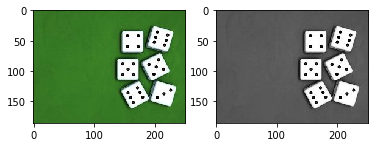

In [13]:
# im = cv2.imread('dice.jpg')
im_orig = cv2.imread('dice02.jpg')
im = cv2.cvtColor(im_orig, cv2.COLOR_BGR2GRAY) # Convert to grayscale

plt.subplot(121)
plt.imshow(im_orig), plt.subplot(122)
plt.imshow(im, cmap='gray')

### Otsu's thresholding

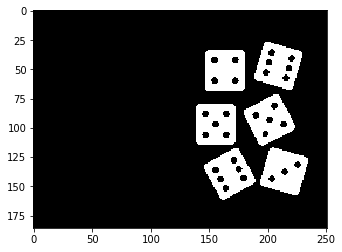

In [14]:
# Otsu's thresholding after Gaussian filtering
kernel = round(0.01*min(im.shape))
kernel = (kernel+1, kernel+1) if kernel%2==0 else (kernel,kernel)

blur = cv2.GaussianBlur(im,kernel,1)
_, bw = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
plt.imshow(bw,cmap='gray')

### Connected components

You rolled 6 dice, for a total of 29.


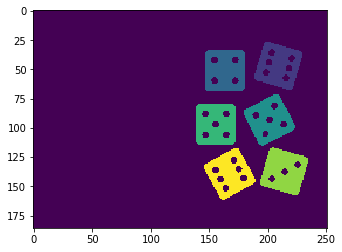

In [17]:
# Use connected components to identify dice and pip regions in the image
_, blobs_dice = cv2.connectedComponents(bw)
t, blobs_pips = cv2.connectedComponents(cv2.bitwise_not(bw)) # invert the image
total = t-2

# Check for blobs that are too small to be dice
# assumes a dice will take up at least 5 percent of the total pixels in the image
min_pixels = round(0.05*np.sum(bw.shape))
for n in np.unique(blobs_dice):
    if np.sum(blobs_dice==n) < min_pixels:
        blobs_dice[blobs_dice==n] = 0

num_dice = len(np.unique(blobs_dice))-1
plt.imshow(blobs_dice)
print("You rolled {} dice, for a total of {}.".format(num_dice, total))

### Counts pips on individual dice

You rolled 6 dice: [6 4 5 5 3 6]


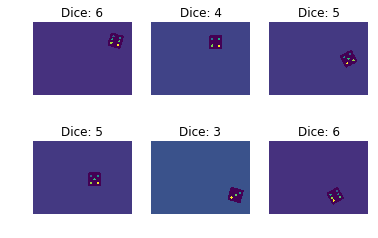

In [15]:
# Loop through each dice region, count the pips it contains
dice = np.zeros(num_dice,dtype=int)
for n in np.arange(1, num_dice+1):    
    # Connected components within the single dice region
    im_single_dice = np.uint8(np.where(blobs_dice==n, blobs_dice, 0))
    im_single_dice[im_single_dice!=0] = 255
    num_pips, pips = cv2.connectedComponents(cv2.bitwise_not(im_single_dice))
    num_pips = num_pips - 2
    dice[n-1] = num_pips    
    
    # Visualize
    plt.subplot(2,3,n)
    plt.imshow(pips)
    plt.axis('off')
    plt.title('Dice: {}'.format(num_pips))

print("You rolled {n_dice} dice: {dice_array}".format(n_dice=num_dice, dice_array=dice))

# Sanity check that the individual pips add up to the total value found before
assert dice.sum() == total, "Individual dice values don't add to total sum found before."

### FillOrBust scoring
Now that we've identified the dice we've rolled, we'd like to know our score

In [16]:
import fillOrBust
turn = fillOrBust.Turn()
turn._dice = dice
turn.calcScore()
print("You rolled {roll} and got {score} points!".format(roll=dice, score=turn._score))

You rolled [6 4 5 5 3 6] and got 100 points!
